# Packing as many rectangles as possible into a larger rectangle with rotation

This is a classic problem in computational geometry.
Given a list of rectangles and a larger rectangle.
The goal is to pack as many rectangles as possible into the larger rectangle.
The rectangles can be rotated by 90 degrees.

CP-SAT allows to easily model this problem using the `AddNoOverlap2D` constraint with `OptionalIntervalVar`-variables.
The `OptionalIntervalVar`-variables allow to change the width and height of the rectangles based on some variables, which can be used to rotate the rectangles.

In [1]:
from pathlib import Path
from solver import Instance

with open(Path("./instances/instance_random_1.json"), "r") as file:
    instance = Instance.model_validate_json(file.read())
print(instance)

container=Container(width=100, height=50) rectangles=[Rectangle(width=18, height=9, value=1), Rectangle(width=18, height=19, value=1), Rectangle(width=10, height=8, value=1), Rectangle(width=19, height=11, value=1), Rectangle(width=17, height=20, value=1), Rectangle(width=3, height=19, value=1), Rectangle(width=15, height=13, value=1), Rectangle(width=8, height=6, value=1), Rectangle(width=6, height=15, value=1), Rectangle(width=11, height=18, value=1), Rectangle(width=18, height=16, value=1), Rectangle(width=3, height=6, value=1), Rectangle(width=10, height=16, value=1), Rectangle(width=16, height=7, value=1), Rectangle(width=10, height=15, value=1), Rectangle(width=13, height=20, value=1), Rectangle(width=7, height=11, value=1), Rectangle(width=17, height=15, value=1), Rectangle(width=20, height=17, value=1), Rectangle(width=15, height=4, value=1), Rectangle(width=17, height=14, value=1), Rectangle(width=4, height=20, value=1), Rectangle(width=18, height=16, value=1), Rectangle(width

In [2]:
from solver import RectangleKnapsackWithRotationsModel

model = RectangleKnapsackWithRotationsModel(instance)

In [3]:
# Solve!
model.solve(60.0)


Starting CP-SAT solver v9.10.4067
Parameters: max_time_in_seconds: 60 log_search_progress: true relative_gap_limit: 0.01
Setting number of workers to 8

Initial optimization model '': (model_fingerprint: 0x48bc7a9cdb3679d0)
#Variables: 400 (#bools: 50 in objective)
  - 100 Booleans in [0,1]
  - 2 in [0,4]
  - 2 in [0,6]
  - 2 in [0,8]
  - 6 in [0,9]
  - 6 in [0,10]
  - 2 in [0,11]
  - 4 in [0,12]
  - 8 in [0,14]
  - 10 in [0,15]
  - 10 in [0,16]
  - 8 in [0,17]
  - 12 in [0,18]
  - 16 in [0,19]
  - 12 in [0,20]
  - 100 in [0,50]
  - 100 in [0,100]
#kInterval: 100 (#enforced: 100)
#kLinear1: 8
#kLinear2: 92
#kNoOverlap2D: 1 (#rectangles: 50, #optional: 50, #quadratic_areas: 50)

Starting presolve at 0.04s
  4.98e-04s  0.00e+00d  [DetectDominanceRelations] 
  3.55e-03s  0.00e+00d  [PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  1.27e-04s  0.00e+00d  [ExtractEncodingFromLinear] 
[Symmetry] Graph for symmetry has 999 nodes and 1'370 arcs.
[Symmetry] Symmetry computation don

2

In [4]:
print(model.solution)

placements=[Placement(x=82, y=32, rotated=True), None, Placement(x=92, y=16, rotated=True), Placement(x=44, y=39, rotated=False), Placement(x=66, y=0, rotated=False), Placement(x=18, y=47, rotated=True), Placement(x=53, y=19, rotated=True), Placement(x=92, y=26, rotated=True), Placement(x=0, y=32, rotated=False), Placement(x=35, y=19, rotated=True), None, Placement(x=63, y=38, rotated=False), Placement(x=90, y=0, rotated=False), Placement(x=48, y=0, rotated=False), Placement(x=72, y=29, rotated=False), None, Placement(x=33, y=39, rotated=True), None, None, Placement(x=67, y=29, rotated=True), None, Placement(x=2, y=0, rotated=True), None, Placement(x=0, y=4, rotated=False), Placement(x=0, y=13, rotated=False), Placement(x=48, y=7, rotated=True), None, Placement(x=19, y=13, rotated=False), Placement(x=31, y=0, rotated=False), None, Placement(x=19, y=17, rotated=True), None, Placement(x=66, y=20, rotated=True), Placement(x=22, y=18, rotated=False), None, Placement(x=6, y=46, rotated=Fals

In [5]:
from _plotting import plot_solution

ModuleNotFoundError: No module named '_plotting'

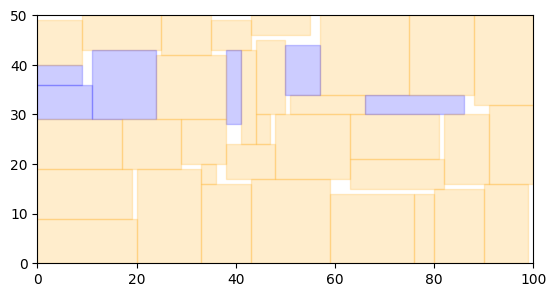

In [5]:
from _plotting import plot_solution

# plot the solution
import matplotlib.pyplot as plt

if model.solution is not None:
    fig, ax = plt.subplots(1)
    plot_solution(ax, instance, model.solution)
    plt.show()